# Geopandas


instalación
* ubuntu: pip install geopandas
* windows: conda install -c conda-forge geopandas

Documentación: http://geopandas.org

In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline


In [127]:
gdf = gpd.read_file('data/Municipios/')
gdf.head()


,CVE_ENT,CVE_MUN,NOM_MUN,OID,geometry
0,09,012,Tlalpan,1,"POLYGON ((-99.1967110331436 19.30240497001839,..."
1,09,013,Xochimilco,2,POLYGON ((-99.13301433831455 19.21009500703628...
2,09,008,La Magdalena Contreras,3,POLYGON ((-99.24488741070159 19.27620941570171...
3,09,002,Azcapotzalco,4,POLYGON ((-99.15718110621088 19.50284888316681...
4,09,014,Benito Ju�rez,5,POLYGON ((-99.14349968483091 19.35724145471904...


In [3]:
type(gdf)

geopandas.geodataframe.GeoDataFrame

In [4]:
type(gdf[['CVE_ENT','CVE_MUN','OID']])

pandas.core.frame.DataFrame

In [5]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2456 entries, 0 to 2455
Data columns (total 5 columns):
CVE_ENT     2456 non-null object
CVE_MUN     2456 non-null object
NOM_MUN     2456 non-null object
OID         2456 non-null int64
geometry    2456 non-null object
dtypes: int64(1), object(4)
memory usage: 96.0+ KB


In [6]:
type(gdf.geometry)

geopandas.geoseries.GeoSeries

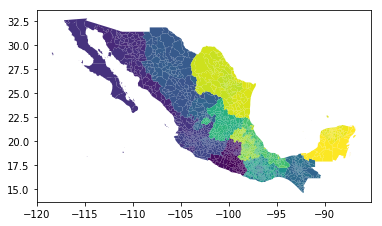

In [128]:
gdf.plot(column='OID')

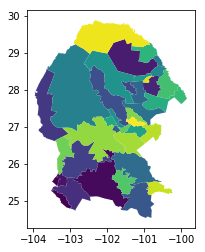

In [8]:

gdf = gdf.loc[gdf.CVE_ENT=='05',:]
gdf.plot(column='OID')


## Lectura

Casi cualquier formato de información geoespacial vectorial

In [9]:
import fiona; fiona.supported_drivers

{'ARCGEN': 'r',
 'AeronavFAA': 'r',
 'BNA': 'raw',
 'DGN': 'raw',
 'DXF': 'raw',
 'ESRI Shapefile': 'raw',
 'GPSTrackMaker': 'raw',
 'GPX': 'raw',
 'GeoJSON': 'rw',
 'Idrisi': 'r',
 'MapInfo File': 'raw',
 'OpenFileGDB': 'r',
 'PCIDSK': 'r',
 'SEGY': 'r',
 'SUA': 'r'}

In [10]:
gpd.read_file('data/delegaciones.json')

,cvegeo,municipio,geometry
0,9010,ALVARO OBREGON,"POLYGON ((-99.26899687 19.30463712, -99.269029..."
1,9002,AZCAPOTZALCO,"POLYGON ((-99.20688081 19.47120497, -99.207120..."
2,9014,BENITO JUAREZ,"POLYGON ((-99.18894424 19.39556665, -99.187556..."
3,9003,COYOACAN,"POLYGON ((-99.10069169 19.29984584, -99.103266..."
4,9004,CUAJIMALPA,"POLYGON ((-99.25561125999999 19.40427641, -99...."
5,9015,CUAUHTEMOC,"POLYGON ((-99.12572428 19.40425509, -99.127240..."
6,9005,GUSTAVO A MADERO,"POLYGON ((-99.07539946999999 19.44866099, -99...."
7,9006,IZTACALCO,"POLYGON ((-99.13541011 19.37723098, -99.134945..."
8,9007,IZTAPALAPA,"POLYGON ((-99.06164945 19.29332949, -99.061707..."
9,9008,MAGDALENA CONTRERAS,"POLYGON ((-99.24178889 19.28882408, -99.241656..."


## Administrando proyecciones, CRS (Coordinate Reference Systems)

In [11]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world[(world.name != "Antarctica") & (world.name != "Fr. S. Antarctic Lands")]
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,..."
1,12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...
2,3639453.0,Europe,Albania,ALB,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,..."
3,4798491.0,Asia,United Arab Emirates,ARE,184300.0,"POLYGON ((51.57951867046327 24.24549713795111,..."
4,40913584.0,South America,Argentina,ARG,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...


Text(0.5,1,'WGS84 (lat/lon)')

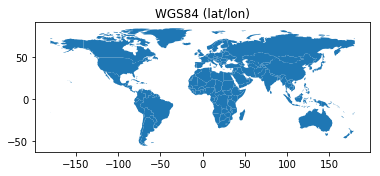

In [12]:
ax = world.plot()
ax.set_title("WGS84 (lat/lon)")

In [13]:
world.crs

{'init': 'epsg:4326'}

In [14]:
# Re asignación
#world.crs = {'init' :'epsg:4326'}

In [15]:
## Re-proyeción
world = world.to_crs({'init': 'epsg:3395'})
world.crs


{'init': 'epsg:3395'}

Text(0.5,1,'Mercator')

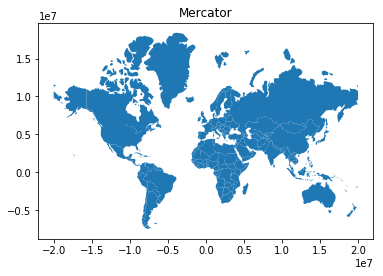

In [16]:
ax = world.plot()
ax.set_title("Mercator")

In [17]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((6813956.989691116 4227673.561898688,..."
1,12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((1817460.822852346 -651055.117933030...
2,3639453.0,Europe,Albania,ALB,21810.0,"POLYGON ((2292095.859226788 5110825.730490864,..."
3,4798491.0,Asia,United Arab Emirates,ARE,184300.0,"POLYGON ((5741805.753758118 2765811.384651244,..."
4,40913584.0,South America,Argentina,ARG,573900.0,(POLYGON ((-7291426.646959423 -7365665.1311332...


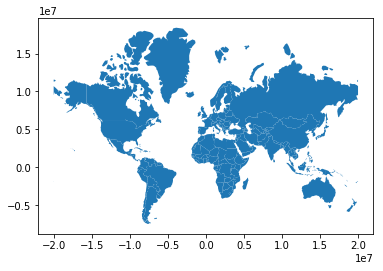

In [18]:
world.to_crs({'proj': 'merc'}).plot()

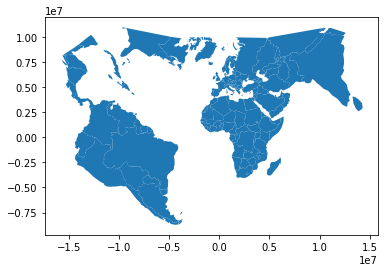

In [19]:
# Transverse mercator
world.to_crs({'proj': 'tmerc'}).plot()

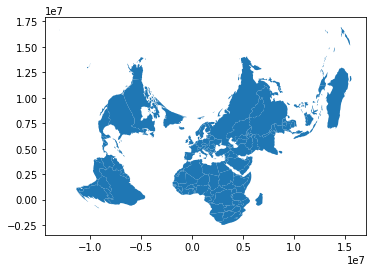

In [20]:
#Albert Equal Area
world.to_crs({'proj': 'aea'}).plot()

CRS are referred to using codes called proj4 strings. You can find the codes for most commonly used projections from www.spatialreference.org or remotesensing.org.

## Ok, qué es una geoserie?

In [21]:
from shapely.geometry import Point, LineString, MultiPoint, MultiLineString, Polygon, MultiPolygon

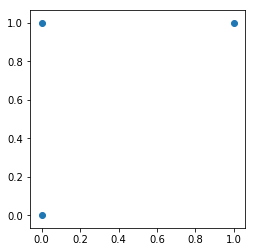

In [22]:
p1 = Point([0,0])
p2 = Point([0,1])
p3 = Point([1,1])
gpd.GeoSeries([p1,p2,p3]).plot()

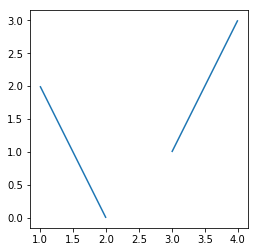

In [23]:
l1 = LineString([[1,2],[2,0]])
l2 = LineString([[3,1],[4,3]])
gpd.GeoSeries([l1,l2]).plot()

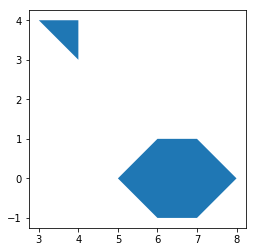

In [24]:
P1 = Polygon([[3,4],[4,3],[4,4]])
P2 = Polygon([[5,0],[6,-1],[7,-1],[8,0],[7,1],[6,1]])
gpd.GeoSeries([P1,P2]).plot()

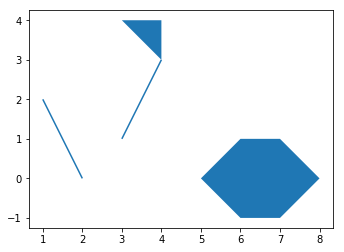

In [25]:
mp = MultiPoint([p1,p2,p3])
ml = MultiLineString([l1,l2])
mP = MultiPolygon([P1,P2])
gpd.GeoSeries([mp,ml,mP]).plot()

In [26]:
gpd.GeoSeries([mp,ml,mP])

0              (POINT (0 0), POINT (0 1), POINT (1 1))
1       (LINESTRING (1 2, 2 0), LINESTRING (3 1, 4 3))
2    (POLYGON ((3 4, 4 3, 4 4, 3 4)), POLYGON ((5 0...
dtype: object

In [129]:
## qué es un GeoDataFrame?

u = pd.DataFrame(np.random.random(size=[3,3]),columns=['A','B','C'])
u

,A,B,C
0,0.172459,0.340769,0.898046
1,0.147707,0.046950,0.469888
2,0.236202,0.119958,0.448978


In [130]:
u = gpd.GeoDataFrame(u, geometry = gpd.GeoSeries([mp,ml,mP]))
u

,A,B,C,geometry
0,0.172459,0.340769,0.898046,"(POINT (0 0), POINT (0 1), POINT (1 1))"
1,0.147707,0.046950,0.469888,"(LINESTRING (1 2, 2 0), LINESTRING (3 1, 4 3))"
2,0.236202,0.119958,0.448978,"(POLYGON ((3 4, 4 3, 4 4, 3 4)), POLYGON ((5 0..."


In [131]:
df = pd.read_csv('data/probe.probe').sample(10000)
df.head()

,Unnamed: 0,timestamp,x,y,speed,provider
100167,9631016,2017-03-30T19:57:24Z,-103.675801,19.802949,67.000,1
164598,1700364,2017-03-30T02:56:10Z,-87.065445,20.668056,2.268,4
330585,190837,2017-03-30T00:18:07Z,-100.504210,21.024270,0.000,2
459082,11079938,2017-03-30T22:25:29Z,-99.190620,19.505728,31.716,4
416119,378840,2017-03-30T00:36:13Z,-99.040950,19.627663,0.000,4


In [30]:
def hacer_punto(row):
    p = Point(row.x,row.y)
    return p
df['geometry'] = df.apply(hacer_punto,axis=1)
df = gpd.GeoDataFrame(df,geometry='geometry')

In [31]:
type(df)

geopandas.geodataframe.GeoDataFrame

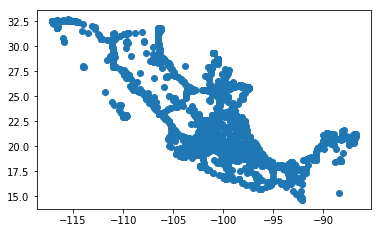

In [32]:
df.plot()

In [33]:
df.crs = {'init' :'epsg:4326'}

# Manipulaciones geometricas

In [34]:
u = pd.DataFrame(gdf.values, columns= gdf.columns)
u

,CVE_ENT,CVE_MUN,NOM_MUN,OID,geometry
0,05,035,Torre�n,2250,(POLYGON ((-103.4279682574413 25.3010926774777...
1,05,024,Parras,2251,"POLYGON ((-102.150401292488 26.42176909598752,..."
2,05,017,Matamoros,2252,POLYGON ((-103.2225245672591 25.75687150448032...
3,05,038,Zaragoza,2253,"POLYGON ((-101.8846877927711 28.7959789025173,..."
4,05,037,Villa Uni�n,2254,POLYGON ((-100.6635448364334 28.22782077655265...
5,05,036,Viesca,2255,POLYGON ((-102.8860226078305 25.62319828897513...
6,05,034,Sierra Mojada,2256,POLYGON ((-103.4872746089281 28.48254470918585...
7,05,033,San Pedro,2257,POLYGON ((-102.4744868719199 26.36738695807912...
8,05,032,San Juan de Sabinas,2258,"POLYGON ((-101.5389054887465 28.0896818427285,..."
9,05,031,San Buenaventura,2259,"POLYGON ((-102.412877083545 28.14203775316171,..."


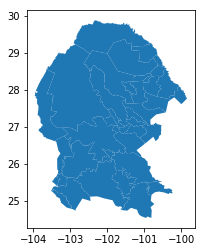

In [35]:
gdf.plot()

     CVE_ENT CVE_MUN   NOM_MUN   OID  \
2270      05     018  Monclova  2271   

                                               geometry  
2270  POLYGON ((-101.1170613923369 26.6996873077993,...  


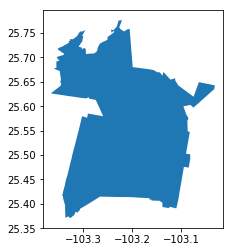

In [36]:
print(gdf.loc[gdf.NOM_MUN=='Monclova',:])
gdf.loc[gdf.NOM_MUN=='Matamoros',:].plot()

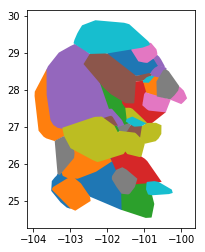

In [37]:
u = pd.DataFrame(gdf.values, columns= gdf.columns)
u = gpd.GeoDataFrame(u,geometry = u.geometry)
u.geometry = u.convex_hull
u.plot(column='OID')

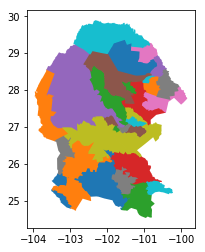

In [38]:
u = pd.DataFrame(gdf.values, columns= gdf.columns)
u = gpd.GeoDataFrame(u,geometry = u.geometry)
u.geometry = u.buffer(0.01)
u.plot(column='OID')

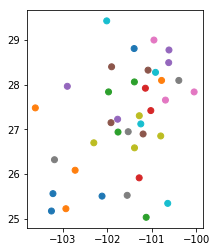

In [39]:
u = pd.DataFrame(gdf.values, columns= gdf.columns)
u = gpd.GeoDataFrame(u,geometry = u.geometry)
u.geometry = u.centroid
u.plot(column='OID')

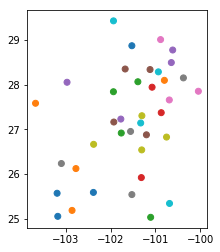

In [40]:
u = pd.DataFrame(gdf.values, columns= gdf.columns)
u = gpd.GeoDataFrame(u,geometry = u.geometry)
u.geometry = u.representative_point()
u.plot(column='OID')

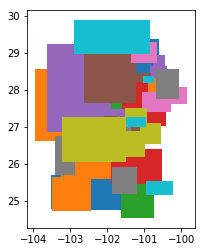

In [41]:
u = pd.DataFrame(gdf.values, columns= gdf.columns)
u = gpd.GeoDataFrame(u,geometry = u.geometry)
u.geometry = u.envelope
u.plot(column='OID')

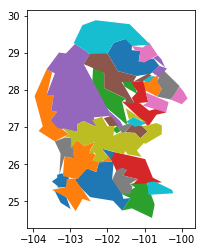

In [42]:
u = pd.DataFrame(gdf.values, columns= gdf.columns)
u = gpd.GeoDataFrame(u,geometry = u.geometry)
u.geometry = u.simplify(0.1)
u.plot(column='OID')

## Atributos


In [43]:
gdf.area.head()   ### Unidades?

2249    0.114866
2250    0.953628
2251    0.072407
2252    0.733791
2253    0.170286
dtype: float64

In [44]:
gdf.length.head()

2249    2.965858
2250    7.543374
2251    1.757637
2252    4.264889
2253    2.081274
dtype: float64

In [45]:
gdf.bounds.head()

,minx,miny,maxx,maxy
2249,-103.510937,24.793104,-102.956807,25.691387
2250,-102.904713,24.754397,-101.379252,26.421769
2251,-103.366155,25.371074,-103.030470,25.776177
2252,-101.997202,28.376462,-100.603667,29.371842
2253,-101.033033,27.821439,-100.538123,28.377465


In [46]:
gdf.total_bounds

array([-103.96000192,   24.54268407,  -99.84311981,   29.88002429])

In [47]:
gdf.geom_type.head()

2249    MultiPolygon
2250         Polygon
2251         Polygon
2252         Polygon
2253         Polygon
dtype: object

In [48]:
gdf.is_valid.head()

2249    True
2250    True
2251    True
2252    True
2253    True
dtype: bool

In [49]:
gdf.distance(Point(-101,26))

2249    2.262429
2250    0.772827
2251    2.061688
2252    2.385896
2253    1.853173
2254    1.709656
2255    2.200562
2256    0.871975
2257    1.892639
2258    1.138397
2259    0.479489
2260    1.103808
2261    1.647383
2262    0.000000
2263    1.026286
2264    2.662027
2265    1.581155
2266    2.367662
2267    1.123463
2268    1.658605
2269    2.239846
2270    0.706706
2271    1.255599
2272    1.446850
2273    2.730375
2274    1.872356
2275    1.852547
2276    0.436741
2277    0.991356
2278    1.901151
2279    1.097964
2280    0.608372
2281    0.212516
2282    0.545837
2283    0.491334
2284    2.193902
2285    3.142070
2286    1.022938
dtype: float64

In [50]:
gdf.contains(Point(-101,26))

2249    False
2250    False
2251    False
2252    False
2253    False
2254    False
2255    False
2256    False
2257    False
2258    False
2259    False
2260    False
2261    False
2262     True
2263    False
2264    False
2265    False
2266    False
2267    False
2268    False
2269    False
2270    False
2271    False
2272    False
2273    False
2274    False
2275    False
2276    False
2277    False
2278    False
2279    False
2280    False
2281    False
2282    False
2283    False
2284    False
2285    False
2286    False
dtype: bool

In [51]:
gdf.intersects(Point(-101,26))

2249    False
2250    False
2251    False
2252    False
2253    False
2254    False
2255    False
2256    False
2257    False
2258    False
2259    False
2260    False
2261    False
2262     True
2263    False
2264    False
2265    False
2266    False
2267    False
2268    False
2269    False
2270    False
2271    False
2272    False
2273    False
2274    False
2275    False
2276    False
2277    False
2278    False
2279    False
2280    False
2281    False
2282    False
2283    False
2284    False
2285    False
2286    False
dtype: bool

## Dissolve

In [52]:
gdf = gpd.read_file('data/Municipios/')

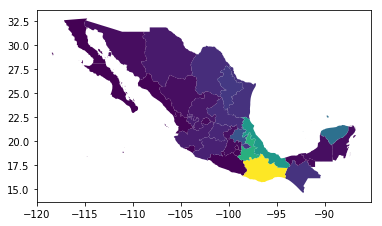

In [53]:
gdf.dissolve('CVE_ENT', aggfunc='sum').plot(column='OID')

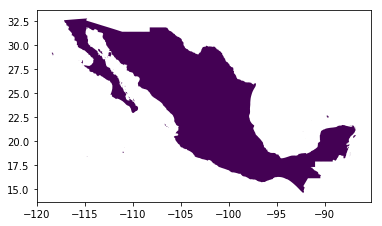

In [54]:
gdf['x']='x'
gdf.dissolve('x').plot(column='OID')

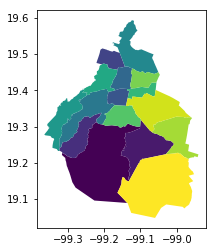

In [55]:
gdf = gdf.loc[gdf.CVE_ENT=='09',:]
gdf.plot(column='OID')


### Joins espaciales

In [133]:
df = gpd.sjoin(gdf,df,how='inner',op='intersects')
df

AttributeError: 'DataFrame' object has no attribute 'crs'

In [57]:
pip install rtree
conda install -c conda-forge rtree

SyntaxError: invalid syntax (<ipython-input-57-656360df8d86>, line 1)

instalación 

Ubuntu: 
    
- Descargar spatialindex de http://download.osgeo.org/libspatialindex/spatialindex-src-1.7.0.tar.gz
- descomprimir
- cambiar al directorio
- sudo su
- ./configue
- make
- make install
- ldconfig
- easy_install Rtree

Windows:

- conda install -c conda-forge rtree

info: http://toblerity.org/rtree/

In [132]:
df.crs

AttributeError: 'DataFrame' object has no attribute 'crs'

In [59]:
df.head()

,CVE_ENT,CVE_MUN,NOM_MUN,OID,geometry,x_left,index_right,Unnamed: 0,timestamp,x_right,y,speed,provider
0,09,012,Tlalpan,1,"POLYGON ((-99.1967110331436 19.30240497001839,...",x,595556,1101361,2017-03-30T01:49:59Z,-99.220856,19.306109,0.000000,1
0,09,012,Tlalpan,1,"POLYGON ((-99.1967110331436 19.30240497001839,...",x,81678,9699833,2017-03-30T20:10:51Z,-99.217950,19.306130,0.000000,2
0,09,012,Tlalpan,1,"POLYGON ((-99.1967110331436 19.30240497001839,...",x,242659,9327171,2017-03-30T19:35:03Z,-99.209350,19.306170,0.000000,2
0,09,012,Tlalpan,1,"POLYGON ((-99.1967110331436 19.30240497001839,...",x,916515,10125414,2017-03-30T20:52:23Z,-99.138043,19.285051,0.000000,1
0,09,012,Tlalpan,1,"POLYGON ((-99.1967110331436 19.30240497001839,...",x,930164,2200393,2017-03-30T04:07:33Z,-99.195760,19.285340,12.606299,4


In [60]:
df = df.to_crs({'init':'epsg:3395'})

In [61]:
df['AREA']=df.area  ## que onda con esto?


In [62]:
u = df.groupby(['NOM_MUN','CVE_ENT','CVE_MUN']).AREA.agg(['count','mean'])

In [63]:
u.head()

,,,count,mean
NOM_MUN,CVE_ENT,CVE_MUN,,
Azcapotzalco,09,002,75,3.769174e+07
Benito Ju�rez,09,014,58,2.998339e+07
Coyoac�n,09,003,66,6.051081e+07
Cuajimalpa de Morelos,09,004,25,8.019867e+07
Cuauht�moc,09,015,103,3.654538e+07


In [64]:
u['densidad_probes']=u['count']/u['mean']  # por qué no u.count/u.mean ?
u.head()

,,,count,mean,densidad_probes
NOM_MUN,CVE_ENT,CVE_MUN,,,
Azcapotzalco,09,002,75,3.769174e+07,1.989826e-06
Benito Ju�rez,09,014,58,2.998339e+07,1.934405e-06
Coyoac�n,09,003,66,6.051081e+07,1.090714e-06
Cuajimalpa de Morelos,09,004,25,8.019867e+07,3.117259e-07
Cuauht�moc,09,015,103,3.654538e+07,2.818414e-06


In [65]:
u = u.reset_index()
u.head()

,NOM_MUN,CVE_ENT,CVE_MUN,count,mean,densidad_probes
0,Azcapotzalco,09,002,75,3.769174e+07,1.989826e-06
1,Benito Ju�rez,09,014,58,2.998339e+07,1.934405e-06
2,Coyoac�n,09,003,66,6.051081e+07,1.090714e-06
3,Cuajimalpa de Morelos,09,004,25,8.019867e+07,3.117259e-07
4,Cuauht�moc,09,015,103,3.654538e+07,2.818414e-06


In [66]:
gdf.head()

,CVE_ENT,CVE_MUN,NOM_MUN,OID,geometry,x
index_left,,,,,,
0,09,012,Tlalpan,1,"POLYGON ((-99.1967110331436 19.30240497001839,...",x
1,09,013,Xochimilco,2,POLYGON ((-99.13301433831455 19.21009500703628...,x
2,09,008,La Magdalena Contreras,3,POLYGON ((-99.24488741070159 19.27620941570171...,x
3,09,002,Azcapotzalco,4,POLYGON ((-99.15718110621088 19.50284888316681...,x
4,09,014,Benito Ju�rez,5,POLYGON ((-99.14349968483091 19.35724145471904...,x


In [67]:
v = pd.merge(u,gdf,how='inner',on=['NOM_MUN','CVE_ENT','CVE_MUN'])
type(v)

pandas.core.frame.DataFrame

In [68]:
v = pd.merge(gdf,u,how='inner',on=['NOM_MUN','CVE_ENT','CVE_MUN'])
type(v)

geopandas.geodataframe.GeoDataFrame

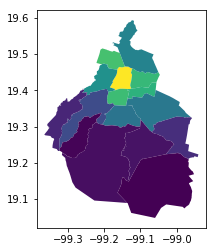

In [69]:
v.sort_values('densidad_probes',ascending=False).head(16).plot(column='densidad_probes')

In [70]:
v = v.to_crs({'init': 'epsg:3395'})


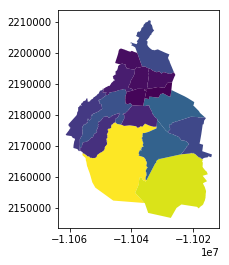

In [71]:
v['AREA'] = v.area
v.sort_values('AREA',ascending=False).plot(column='AREA')

### Otras columnas geometry

In [72]:
df.head()

,CVE_ENT,CVE_MUN,NOM_MUN,OID,geometry,x_left,index_right,Unnamed: 0,timestamp,x_right,y,speed,provider,AREA
0,09,012,Tlalpan,1,"POLYGON ((-11042527.36057705 2176454.42710185,...",x,595556,1101361,2017-03-30T01:49:59Z,-99.220856,19.306109,0.000000,1,3.523801e+08
0,09,012,Tlalpan,1,"POLYGON ((-11042527.36057705 2176454.42710185,...",x,81678,9699833,2017-03-30T20:10:51Z,-99.217950,19.306130,0.000000,2,3.523801e+08
0,09,012,Tlalpan,1,"POLYGON ((-11042527.36057705 2176454.42710185,...",x,242659,9327171,2017-03-30T19:35:03Z,-99.209350,19.306170,0.000000,2,3.523801e+08
0,09,012,Tlalpan,1,"POLYGON ((-11042527.36057705 2176454.42710185,...",x,916515,10125414,2017-03-30T20:52:23Z,-99.138043,19.285051,0.000000,1,3.523801e+08
0,09,012,Tlalpan,1,"POLYGON ((-11042527.36057705 2176454.42710185,...",x,930164,2200393,2017-03-30T04:07:33Z,-99.195760,19.285340,12.606299,4,3.523801e+08


In [73]:
df['geometry2']=df.centroid

In [74]:
df['geometry3']=df.geometry

In [75]:
df.geometry = df.geometry2
df.head()

,CVE_ENT,CVE_MUN,NOM_MUN,OID,geometry,x_left,index_right,Unnamed: 0,timestamp,x_right,y,speed,provider,AREA,geometry2,geometry3
0,09,012,Tlalpan,1,POINT (-11043585.68608504 2164260.573296153),x,595556,1101361,2017-03-30T01:49:59Z,-99.220856,19.306109,0.000000,1,3.523801e+08,POINT (-11043585.68608504 2164260.573296153),"POLYGON ((-11042527.36057705 2176454.42710185,..."
0,09,012,Tlalpan,1,POINT (-11043585.68608504 2164260.573296153),x,81678,9699833,2017-03-30T20:10:51Z,-99.217950,19.306130,0.000000,2,3.523801e+08,POINT (-11043585.68608504 2164260.573296153),"POLYGON ((-11042527.36057705 2176454.42710185,..."
0,09,012,Tlalpan,1,POINT (-11043585.68608504 2164260.573296153),x,242659,9327171,2017-03-30T19:35:03Z,-99.209350,19.306170,0.000000,2,3.523801e+08,POINT (-11043585.68608504 2164260.573296153),"POLYGON ((-11042527.36057705 2176454.42710185,..."
0,09,012,Tlalpan,1,POINT (-11043585.68608504 2164260.573296153),x,916515,10125414,2017-03-30T20:52:23Z,-99.138043,19.285051,0.000000,1,3.523801e+08,POINT (-11043585.68608504 2164260.573296153),"POLYGON ((-11042527.36057705 2176454.42710185,..."
0,09,012,Tlalpan,1,POINT (-11043585.68608504 2164260.573296153),x,930164,2200393,2017-03-30T04:07:33Z,-99.195760,19.285340,12.606299,4,3.523801e+08,POINT (-11043585.68608504 2164260.573296153),"POLYGON ((-11042527.36057705 2176454.42710185,..."



## Operaciones booleanas


In [76]:
polys1 = gpd.GeoSeries([Polygon([(0,0), (2,0), (2,2), (0,2)]),Polygon([(2,2), (4,2), (4,4), (2,4)])])
polys2 = gpd.GeoSeries([Polygon([(1,1), (3,1), (3,3), (1,3)]),Polygon([(3,3), (5,3), (5,5), (3,5)])])

In [77]:
df1 = gpd.GeoDataFrame({'geometry': polys1, 'df1':[1,2]})
df2 = gpd.GeoDataFrame({'geometry': polys2, 'df2':[1,2]})

In [78]:
df1

,df1,geometry
0,1,"POLYGON ((0 0, 2 0, 2 2, 0 2, 0 0))"
1,2,"POLYGON ((2 2, 4 2, 4 4, 2 4, 2 2))"


In [79]:
df2

,df2,geometry
0,1,"POLYGON ((1 1, 3 1, 3 3, 1 3, 1 1))"
1,2,"POLYGON ((3 3, 5 3, 5 5, 3 5, 3 3))"


In [80]:
df1.area

0    4.0
1    4.0
dtype: float64

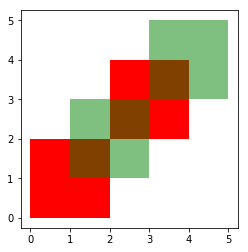

In [81]:
ax = df1.plot(color='red');

df2.plot(ax=ax, color='green', alpha=0.5);

In [82]:
res_union = gpd.overlay(df1, df2, how='union')

In [83]:
res_union

,df1,df2,geometry
0,1.0,NaN,"POLYGON ((2 1, 2 0, 0 0, 0 2, 1 2, 1 1, 2 1))"
1,1.0,1.0,"POLYGON ((2 1, 1 1, 1 2, 2 2, 2 1))"
2,NaN,1.0,"POLYGON ((2 1, 2 2, 3 2, 3 1, 2 1))"
3,NaN,1.0,"POLYGON ((2 2, 1 2, 1 3, 2 3, 2 2))"
4,2.0,NaN,"POLYGON ((3 2, 3 3, 4 3, 4 2, 3 2))"
5,2.0,1.0,"POLYGON ((3 3, 3 2, 2 2, 2 3, 3 3))"
6,2.0,NaN,"POLYGON ((3 3, 2 3, 2 4, 3 4, 3 3))"
7,NaN,2.0,"POLYGON ((4 3, 4 4, 3 4, 3 5, 5 5, 5 3, 4 3))"
8,2.0,2.0,"POLYGON ((3 4, 4 4, 4 3, 3 3, 3 4))"


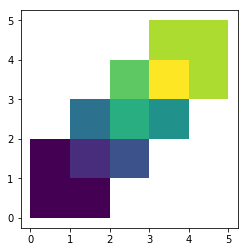

In [84]:
res_union = gpd.overlay(df1, df2, how='union')
res_union['x']=list(range(len(res_union)))
res_union.plot(column='x')


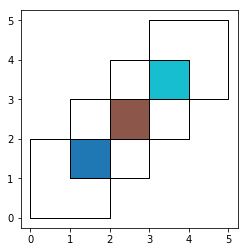

In [85]:
res_intersection = gpd.overlay(df1, df2, how='intersection')
res_intersection['x']=list(range(len(res_intersection)))

ax = res_intersection.plot(cmap='tab10')

df1.plot(ax=ax, facecolor='none', edgecolor='k');

df2.plot(ax=ax, facecolor='none', edgecolor='k');

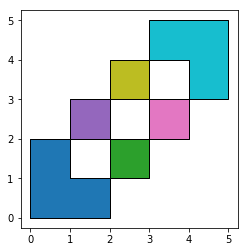

In [86]:
res_symdiff = gpd.overlay(df1, df2, how='symmetric_difference')



ax = res_symdiff.plot(cmap='tab10')

df1.plot(ax=ax, facecolor='none', edgecolor='k')

df2.plot(ax=ax, facecolor='none', edgecolor='k')

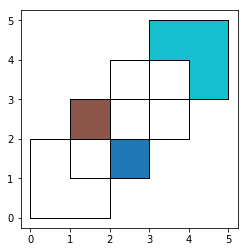

In [87]:
res_difference = gpd.overlay(df2, df1, how='difference')


ax = res_difference.plot(cmap='tab10')
df1.plot(ax=ax, facecolor='none', edgecolor='k')
df2.plot(ax=ax, facecolor='none', edgecolor='k')

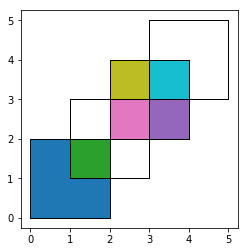

In [88]:
res_identity = gpd.overlay(df1, df2, how='identity')


ax = res_identity.plot(cmap='tab10')

df1.plot(ax=ax, facecolor='none', edgecolor='k')

df2.plot(ax=ax, facecolor='none', edgecolor='k')

In [89]:
gdf.difference(other)

gdf.intersection(other)

gdf.symmetric_difference(other)

gdf.union(other)

NameError: name 'other' is not defined

### Geocoding y Geocoding inverso

In [113]:
gdf = pd.read_csv('data/Coppel.csv').sample(10)
gdf.head()

,Unnamed: 0,id,nom_estab,raz_social,codigo_act,nombre_act,per_ocu,tipo_vial,nom_vial,tipo_v_e_1,...,localidad,ageb,manzana,telefono,correoelec,www,tipoUniEco,latitud,longitud,fecha_alta
1223,1224,6374840,COPPEL CANADA ZAPATERÍA JUÁREZ 1077,COPPEL SA DE CV,463310,Comercio al por menor de calzado,11 a 30 personas,AVENIDA,JUÁREZ,CALLE,...,Tlacolula de Matamoros,0127,24,9.515622e+09,FZAMUDIO@COPPEL.COM,WWW.COPPEL.COM,Fijo,16.958731,-96.477760,DICIEMBRE 2014
698,699,6377217,COPPEL CANADA ORIENTE 765,COPPEL SA DE CV,462210,Comercio al por menor en tiendas departamentales,11 a 30 personas,CALLE,3 ORIENTE,CALLE,...,Tehuacán,0569,21,2.388384e+10,FZAMUDIO@COPPEL.COM,WWW.COPPEL.COM,Fijo,18.460751,-97.389053,MARZO 2011
400,401,6341949,COPPEL REFORMA 244,COPPEL SA DE CV,462210,Comercio al por menor en tiendas departamentales,51 a 100 personas,CALLE,REFORMA,CALLE,...,Ciudad Guzmán,0064,14,3.414130e+09,FZAMUDIO@COPPEL.COM,WWW.COPPEL.COM,Fijo,19.703362,-103.465108,JULIO 2010
685,686,6379770,COPPEL 3 SUR 125,COPPEL SA DE CV,462210,Comercio al por menor en tiendas departamentales,51 a 100 personas,CALLE,3 SUR,AVENIDA,...,Tehuacán,0075,11,2.383839e+09,FZAMUDIO@COPPEL.COM,WWW.COPPEL.COM,Fijo,18.462368,-97.391382,JULIO 2010
344,345,6767086,COPPEL CANADA,COPPEL SA DE CV,462210,Comercio al por menor en tiendas departamentales,11 a 30 personas,CALLE,MARÍA GUADALUPE MARTÍNEZ DE HERNÁNDEZ LOZA,CALLE,...,Guadalajara,4211,33,1.333604e+10,NaN,NaN,Fijo,20.690643,-103.278575,OCTUBRE 2016


In [114]:
l = [Point(xy) for xy in zip(gdf.latitud,gdf.longitud)]
l[0:5]

In [115]:
gdf = gpd.GeoDataFrame(gdf,geometry=l)
gdf.head()

,Unnamed: 0,id,nom_estab,raz_social,codigo_act,nombre_act,per_ocu,tipo_vial,nom_vial,tipo_v_e_1,...,ageb,manzana,telefono,correoelec,www,tipoUniEco,latitud,longitud,fecha_alta,geometry
1223,1224,6374840,COPPEL CANADA ZAPATERÍA JUÁREZ 1077,COPPEL SA DE CV,463310,Comercio al por menor de calzado,11 a 30 personas,AVENIDA,JUÁREZ,CALLE,...,0127,24,9.515622e+09,FZAMUDIO@COPPEL.COM,WWW.COPPEL.COM,Fijo,16.958731,-96.477760,DICIEMBRE 2014,POINT (16.9587311 -96.47775986000001)
698,699,6377217,COPPEL CANADA ORIENTE 765,COPPEL SA DE CV,462210,Comercio al por menor en tiendas departamentales,11 a 30 personas,CALLE,3 ORIENTE,CALLE,...,0569,21,2.388384e+10,FZAMUDIO@COPPEL.COM,WWW.COPPEL.COM,Fijo,18.460751,-97.389053,MARZO 2011,POINT (18.46075099 -97.38905291)
400,401,6341949,COPPEL REFORMA 244,COPPEL SA DE CV,462210,Comercio al por menor en tiendas departamentales,51 a 100 personas,CALLE,REFORMA,CALLE,...,0064,14,3.414130e+09,FZAMUDIO@COPPEL.COM,WWW.COPPEL.COM,Fijo,19.703362,-103.465108,JULIO 2010,POINT (19.70336215 -103.46510835)
685,686,6379770,COPPEL 3 SUR 125,COPPEL SA DE CV,462210,Comercio al por menor en tiendas departamentales,51 a 100 personas,CALLE,3 SUR,AVENIDA,...,0075,11,2.383839e+09,FZAMUDIO@COPPEL.COM,WWW.COPPEL.COM,Fijo,18.462368,-97.391382,JULIO 2010,POINT (18.46236839 -97.39138173000001)
344,345,6767086,COPPEL CANADA,COPPEL SA DE CV,462210,Comercio al por menor en tiendas departamentales,11 a 30 personas,CALLE,MARÍA GUADALUPE MARTÍNEZ DE HERNÁNDEZ LOZA,CALLE,...,4211,33,1.333604e+10,NaN,NaN,Fijo,20.690643,-103.278575,OCTUBRE 2016,POINT (20.69064281 -103.2785745)


In [116]:
gdf = gdf.fillna(0)
gdf['direccion'] = gdf.nom_vial+' '+gdf.numero_ext.astype(int).astype(str)\
                        +', '+gdf.cod_postal.astype(int).astype(str)+', '+gdf.municipio
gdf[['direccion','geometry']].head()

,direccion,geometry
1223,"JUÁREZ 24, 70400, Tlacolula de Matamoros",POINT (16.9587311 -96.47775986000001)
698,"3 ORIENTE 504, 75700, Tehuacán",POINT (18.46075099 -97.38905291)
400,"REFORMA 49, 49000, Zapotlán el Grande",POINT (19.70336215 -103.46510835)
685,"3 SUR 0, 75700, Tehuacán",POINT (18.46236839 -97.39138173000001)
344,MARÍA GUADALUPE MARTÍNEZ DE HERNÁNDEZ LOZA 200...,POINT (20.69064281 -103.2785745)


In [117]:
from geopy.geocoders import Nominatim
geolocator = Nominatim()
location = geolocator.geocode("175 5th Avenue NYC")
location

Location(Flatiron Building, 175, 5th Avenue, Flatiron Building, Manhattan Community Board 5, New York County, NYC, New York, 10010, United States of America, (40.7410861, -73.9896298241625, 0.0))

In [119]:
gdf['coordenadas'] = gdf.head(5).direccion.apply(geolocator.geocode)

In [125]:
gdf.iloc[2,:].coordenadas



Location(Av. Reforma, Ciudad Guzmán, Zapotlán el Grande, Jalisco, 49070, México, (19.7033906, -103.4660491, 0.0))

In [111]:
location = geolocator.reverse("22.23051478,-102.32095893")
location.address

'Coppel, Avenida Morelos, Ganaderia, Rincón de Romos, Aguascalientes, 20408, México'

** Quiz ** Modifica el código para obtener la columna coordenadas como una geometria. Usa funciones apply

** Quiz ** Crea una función apply que te devuelva la dirección si le envias un objeto Point()

## Datos

### Descargando los datos diréctamente

http://www.conabio.gob.mx/informacion/gis/

http://geo.datos.gob.mx/geoserver/web/wicket/bookmarkable/org.geoserver.web.demo.MapPreviewPage?1

http://www.inegi.org.mx/geo/contenidos/geoestadistica/m_geoestadistico.aspx

In [ ]:
hidro_lotica = gpd.read_file('hidrolingw/')
hidro_lotica.plot()

In [ ]:
hidro_lotica.head()

In [ ]:
# conectandose a un api

In [ ]:
df.to_file('geoDF.geojson', driver="GeoJSON")

In [ ]:
gdf.to_file('CDMX')